# Проект: Линейные модели в машинном обучении


## Цель проекта:

Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке новых коров.

**Описание данных:**

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент:

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- Порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
\

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера:

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.\

Файл `cow_buy.csv` содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- Порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).\

**План проекта:**

- Загрузка и изучение данных
- Предобработка данных
- Исследовательский анализ данных
- Корреляционный анализ признаков в `ferma_main.csv`
- Построение моделей линейной регрессии
- Построение моделей логистической регрессии
- Общий вывод

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn. metrics import precision_recall_curve

## Загрузка данных

Загрузим данные и сохраним в 3 датафрейма

In [6]:
df_ferma_main=pd.read_csv('/datasets/ferma_main.csv',sep=';')
df_ferma_dad=pd.read_csv('/datasets/ferma_dad.csv',sep=';')
df_cow_by=pd.read_csv('/datasets/cow_buy.csv',sep=';')

Изучим общую инормацию.

In [7]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [8]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
df_cow_by.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [10]:
df_ferma_main.head(2)


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет


In [11]:
df_ferma_dad.head(2)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик


In [12]:
df_cow_by.head(2)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет


**Вывод:**\
В `df_ferma_main` хранится 634 записи. В записях неправильный тип данных некоторых столбцов;\
В `df_cow_by` 20 записей. В записях неправильный тип данных некоторых столбцов;\
Наименования столбцов во всех датафреймах необходимо изменить.

##  Предобработка данных

Проверим на явные дубликаты

In [13]:
df_ferma_main.duplicated().sum()

5

In [14]:
df_ferma_dad.duplicated().sum()

0

In [15]:
df_cow_by.duplicated().sum()

4

Удалим явные дубликаты в коровах фермера. \
Так как к покупке предлагается всего 20 коров, удалять дубликаты в `df_cow_by` не будем.

In [16]:
print(df_ferma_main.shape)

df_ferma_main=df_ferma_main.drop_duplicates()

print(df_ferma_main.shape)


(634, 12)
(629, 12)


Дубликаты удалены

Далее - работа с пропусками.

In [17]:
print(df_ferma_dad.isna().sum())
print(df_cow_by.isna().sum())
print(df_ferma_main.isna().sum())

id          0
Имя Папы    0
dtype: int64
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64


Пропусков не обнаружено.

следующий этап - приведем названия столбцов к змеиному регистру.

In [18]:
df_ferma_main.columns = df_ferma_main.columns.str.lower()
df_ferma_dad.columns = df_ferma_dad.columns.str.lower()
df_cow_by.columns = df_cow_by.columns.str.lower()

print(df_ferma_main.columns)
print(df_ferma_dad.columns)
print(df_cow_by.columns)

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')
Index(['id', 'имя папы'], dtype='object')
Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы',
       'текущая_жирность,%', 'текущий_уровень_белок,%', 'возраст'],
      dtype='object')


Переименуем столбцы на латиницу.

In [19]:
df_ferma_main.columns = ['id', 'yield', 'energy_feed_unit',
       'crude_protein', 'sugar-protein_ratio', 'breed',
       'type_of_pasture', 'father_breed', 'fat', 'protein',
       'taste_of_milk', 'age']
df_ferma_dad.columns = ['id', 'father_name']
df_cow_by.columns = ['breed', 'type_of_pasture', 'father_breed', 'father_name',
       'current_fat_content', 'current_protein_content', 'age']

In [20]:
print(df_ferma_main.columns)
print(df_ferma_dad.columns)
print(df_cow_by.columns)

Index(['id', 'yield', 'energy_feed_unit', 'crude_protein',
       'sugar-protein_ratio', 'breed', 'type_of_pasture', 'father_breed',
       'fat', 'protein', 'taste_of_milk', 'age'],
      dtype='object')
Index(['id', 'father_name'], dtype='object')
Index(['breed', 'type_of_pasture', 'father_breed', 'father_name',
       'current_fat_content', 'current_protein_content', 'age'],
      dtype='object')


На очереди неявные дубликаты.

In [21]:
df_ferma_main['father_breed'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: father_breed, dtype: int64

Заменим Айдиалл на Айдиал, то есть исправим опечатку.

In [22]:
df_ferma_main.loc[df_ferma_main['father_breed'] == "Айдиалл", 'father_breed'] = 'Айдиал'

In [23]:
df_ferma_main['father_breed'].value_counts()

Айдиал     318
Соверин    311
Name: father_breed, dtype: int64

In [24]:
df_ferma_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Приведем к нижнему регистру категориальные данные в столбцах Порода, Тип пастбища, Порода отца.

In [25]:
df_ferma_main['breed'] = df_ferma_main['breed'].str.lower()
df_ferma_main['type_of_pasture'] = df_ferma_main['type_of_pasture'].str.lower()
df_ferma_main['father_breed'] = df_ferma_main['father_breed'].str.lower()

In [26]:
df_ferma_main['type_of_pasture'].unique()

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

Заменим еще одну опечатку: `равнинные` на `равнинное`

In [27]:
df_ferma_main.loc[df_ferma_main['type_of_pasture'] == "равнинные", 'type_of_pasture'] = 'равнинное'

In [28]:
df_ferma_main['type_of_pasture'].unique()

array(['равнинное', 'холмистое'], dtype=object)

Откорректируем названия Породы.

In [29]:
df_ferma_main.loc[df_ferma_main['breed'] == "вис бик айдиал", 'breed'] = 'вис_бик_айдиал'

In [30]:
df_ferma_main.loc[df_ferma_main['breed'] == "рефлешнсоверинг", 'breed'] = 'рефлешн_соверинг'

In [31]:
df_ferma_main.head()

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age
0,1,5863,"14,2",1743,"0,89",вис_бик_айдиал,равнинное,айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",вис_бик_айдиал,равнинное,соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",рефлешн_соверинг,холмистое,соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",рефлешн_соверинг,холмистое,айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",вис_бик_айдиал,равнинное,соверин,"3,73","3,073",вкусно,менее_2_лет


In [32]:
df_ferma_dad.head()

,id,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [33]:
df_ferma_dad['father_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [34]:
df_cow_by.loc[df_cow_by['breed'] == 'Вис Бик Айдиал', 'breed'] = 'вис_бик_айдиал'
df_cow_by.loc[df_cow_by['breed'] == 'РефлешнСоверинг', 'breed'] = 'рефлешн_соверинг'

Пробежимся циклом по всем уникальным значениям категориальных признаков `df_cow_by`

In [35]:
for t in ['breed', 'type_of_pasture', 'father_breed', 'father_name', 'age']:
    print(df_cow_by[t].unique())

['вис_бик_айдиал' 'рефлешн_соверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


Приведем к нижнему регистру оставшиеся категориальные признаки.

In [36]:
df_cow_by['father_breed'] = df_cow_by['father_breed'].str.lower()
df_cow_by['father_name'] = df_cow_by['father_name'].str.lower()

In [37]:
df_cow_by.head()

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age
0,вис_бик_айдиал,холмистое,айдиал,геркулес,"3,58","3,076",более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,"3,54","3,081",менее_2_лет
2,рефлешн_соверинг,равнинное,соверин,барин,"3,59","3,074",более_2_лет
3,рефлешн_соверинг,холмистое,айдиал,буйный,"3,4","3,061",более_2_лет
4,рефлешн_соверинг,равнинное,айдиал,буйный,"3,64","3,074",более_2_лет


Изучили аномалии в столбце Удой.

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: yield, dtype: float64


<AxesSubplot:>

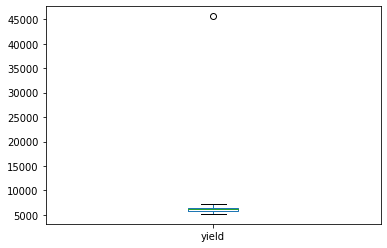

In [38]:
print(df_ferma_main['yield'].describe())
df_ferma_main['yield'].plot(kind='box')

Видим аномальное значение - удалим его.

In [39]:
df_ferma_main[df_ferma_main['yield']>10001]

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age
16,17,45616,"11,5",1675,"0,93",вис_бик_айдиал,холмистое,айдиал,"3,22","3,076",вкусно,более_2_лет


In [40]:
df_ferma_main=df_ferma_main.drop(index=16).reset_index(drop=True)

In [41]:
df_ferma_dad=df_ferma_dad.drop(index=16).reset_index(drop=True)

In [42]:
df_ferma_main.head()

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age
0,1,5863,"14,2",1743,"0,89",вис_бик_айдиал,равнинное,айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",вис_бик_айдиал,равнинное,соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",рефлешн_соверинг,холмистое,соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",рефлешн_соверинг,холмистое,айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",вис_бик_айдиал,равнинное,соверин,"3,73","3,073",вкусно,менее_2_лет


Перейдем к типам данных.

In [43]:
df_ferma_main.dtypes

id                      int64
yield                   int64
energy_feed_unit       object
crude_protein           int64
sugar-protein_ratio    object
breed                  object
type_of_pasture        object
father_breed           object
fat                    object
protein                object
taste_of_milk          object
age                    object
dtype: object

Видим несоответствие. Изменим типы данных на числовые в эке, СПО, жирность, белок.

In [44]:
for t in ['energy_feed_unit', 'sugar-protein_ratio', 'fat', 'protein']:
    df_ferma_main[t] = df_ferma_main[t].str.replace(',', '.')

In [45]:
for t in ['energy_feed_unit', 'sugar-protein_ratio', 'fat', 'protein']:
    df_ferma_main[t] = pd.to_numeric(df_ferma_main[t], errors = 'raise')

In [46]:
df_ferma_main.dtypes

id                       int64
yield                    int64
energy_feed_unit       float64
crude_protein            int64
sugar-protein_ratio    float64
breed                   object
type_of_pasture         object
father_breed            object
fat                    float64
protein                float64
taste_of_milk           object
age                     object
dtype: object

In [47]:
df_cow_by.columns

Index(['breed', 'type_of_pasture', 'father_breed', 'father_name',
       'current_fat_content', 'current_protein_content', 'age'],
      dtype='object')

In [48]:
df_cow_by.dtypes

breed                      object
type_of_pasture            object
father_breed               object
father_name                object
current_fat_content        object
current_protein_content    object
age                        object
dtype: object

In [49]:
for t in ['current_fat_content', 'current_protein_content']:
    df_cow_by[t] = df_cow_by[t].str.replace(',', '.')

In [50]:
for t in ['current_fat_content', 'current_protein_content']:
    df_cow_by[t] = pd.to_numeric(df_cow_by[t], errors = 'raise')

In [51]:
df_cow_by['current_fat_content'] = pd.to_numeric(df_cow_by['current_fat_content'], errors = 'raise')

**Выводы:**
- Изменены названия столбцов датафреймов. Столбцы приведены к нижнему регистру и латинице;
- Пропусков среди данных не обнаружено;
- Обнаружены явные и неявные дубликаты. Явные дубликаты были удалены. Неявные дубликаты были исправлены;
- В `df_ferma_main` в столбце Удой удалено аномальное значение;
- Типы данных приведены в соответствие.

## Исследовательский анализ данных

### Построим графики для числовых значений.

In [52]:
df_ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,628.0,315.474522,181.475367,1.000,158.750,315.500,472.250,629.000
yield,628.0,6125.968153,475.857053,5204.000,5749.750,6132.500,6501.000,7222.000
energy_feed_unit,628.0,14.548726,1.301777,10.900,13.500,14.700,15.600,16.800
crude_protein,628.0,1923.759554,182.832816,1660.000,1771.750,1888.000,2062.250,2349.000
sugar-protein_ratio,628.0,0.913089,0.032221,0.840,0.890,0.930,0.940,0.960
fat,628.0,3.604268,0.168093,2.990,3.590,3.650,3.720,3.750
protein,628.0,3.075670,0.002551,3.069,3.074,3.076,3.077,3.085


Построим диаграммы размаха количественных признаков для `df_ferma_main`

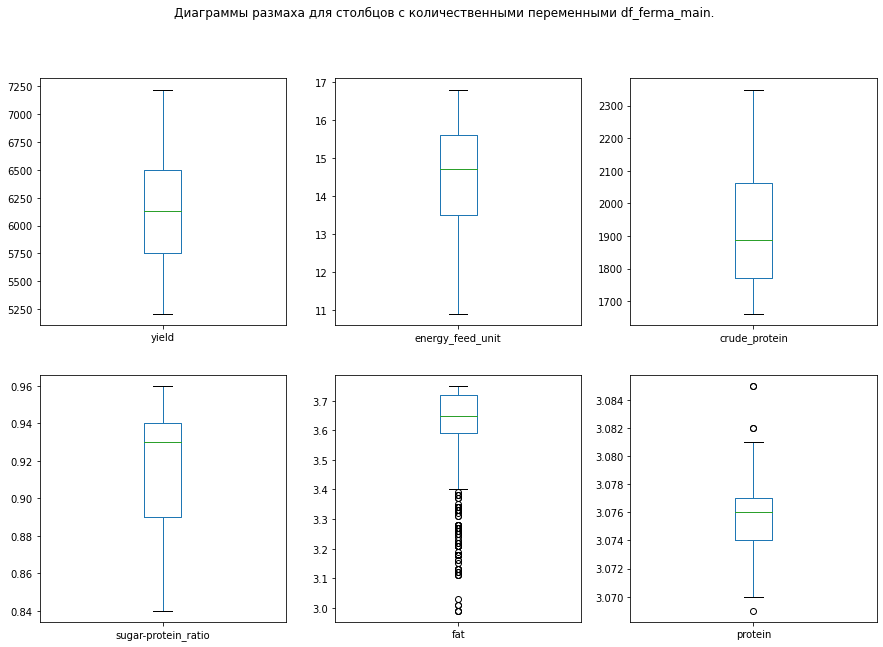

In [53]:
plt.figure(figsize=(15,10))
plt.suptitle('Диаграммы размаха для столбцов с количественными переменными df_ferma_main.');

for i,t in enumerate(['yield', 'energy_feed_unit', 'crude_protein', 'sugar-protein_ratio', 'fat', 'protein'], start=1):
    plt.subplot (2,3,i)
    df_ferma_main[t].plot(kind='box')



Видим выбросы в параметре жирность и белок. 

Построим диаграммы размаха количественных признаков для `df_cow_by`

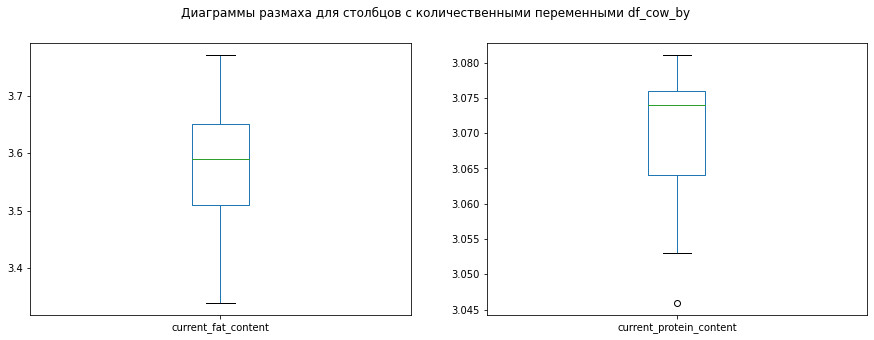

In [54]:
plt.figure(figsize=(15,5))
plt.suptitle('Диаграммы размаха для столбцов с количественными переменными df_cow_by');

for i,t in enumerate(['current_fat_content', 'current_protein_content'], start=1):
    plt.subplot (1,2,i)
    df_cow_by[t].plot(kind='box')



Следующий шаг - создадим функцию для создания гистограмм.

In [55]:
def hist (df, column, sign):
    plt.figure(figsize=(15,5));
    plt.hist(df[column], bins=25);
    plt.title(f'Гистограмма для признака {sign}');
    plt.ylabel('Количество коров');
    plt.xlabel(sign);
    plt.grid();
    

Созадим с помощью функции гистограммы количественных признаков.

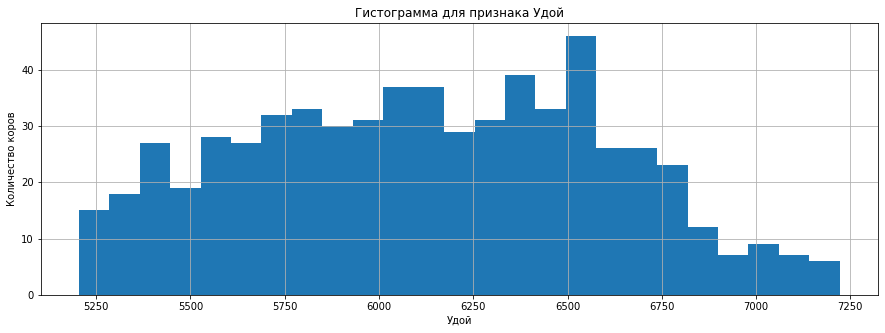

In [56]:
hist(df_ferma_main, 'yield', 'Удой')

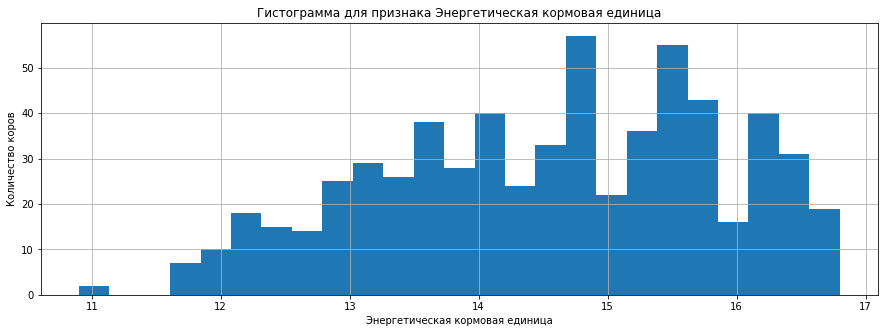

In [57]:
hist(df_ferma_main, 'energy_feed_unit', 'Энергетическая кормовая единица')

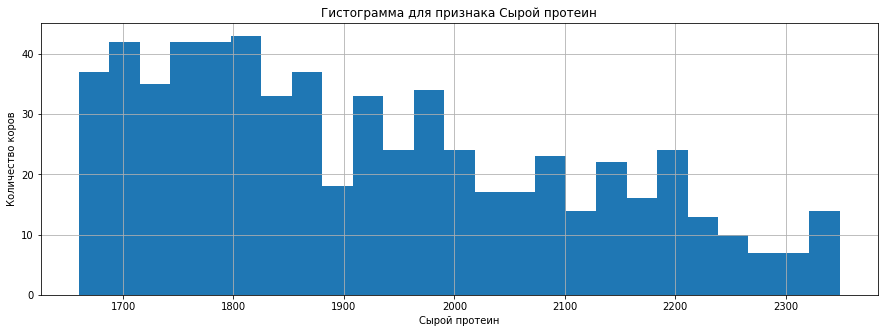

In [58]:
hist(df_ferma_main, 'crude_protein', 'Сырой протеин')

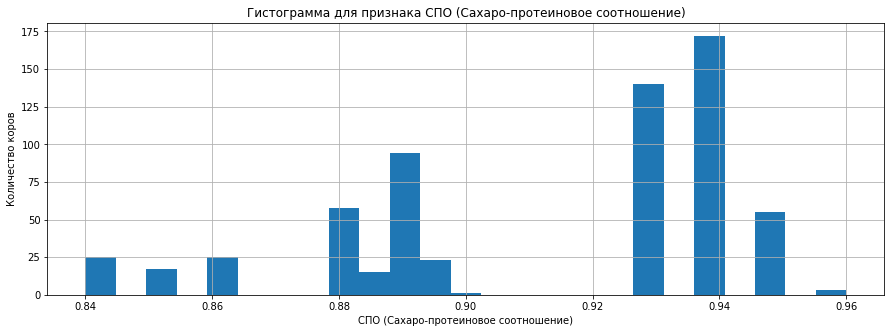

In [59]:
hist(df_ferma_main, 'sugar-protein_ratio', 'СПО (Сахаро-протеиновое соотношение)')

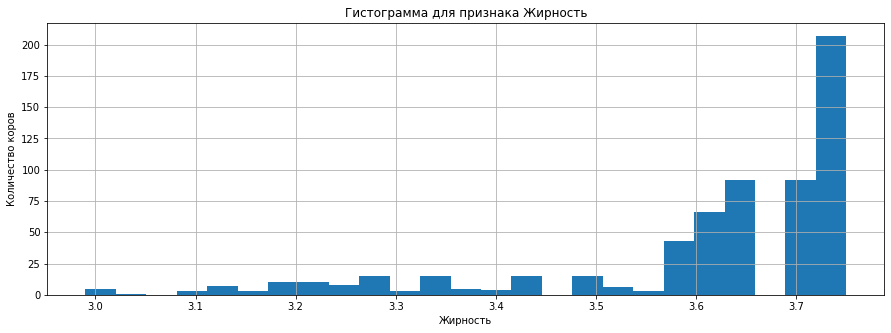

In [60]:
hist(df_ferma_main, 'fat', 'Жирность')

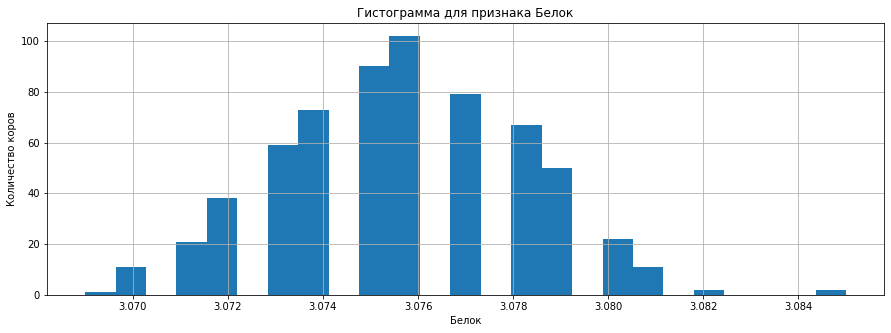

In [61]:
hist(df_ferma_main, 'protein', 'Белок')

Создадим функцию для создания столбчатого графика для категориальных переменных.

In [62]:
def bar(df, column, title):
    plt.figure(figsize=(10,5))
    sns.countplot(data = df, x=column)
    plt.title(f'Количестов коров разрезе признака {title}')
    plt.xlabel(title)
    plt.ylabel('Количество коров')
    plt.grid()
    

### Построим графики для категорий

#### Для `df_ferma_main`

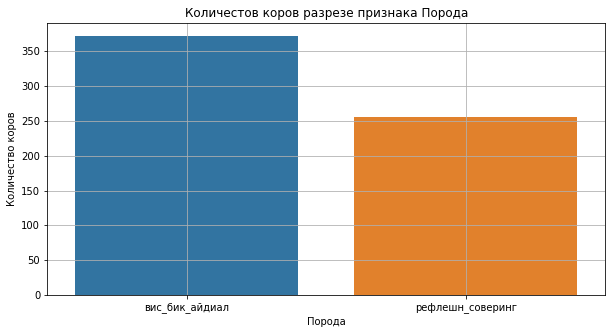

In [63]:
bar(df_ferma_main, 'breed', 'Порода')

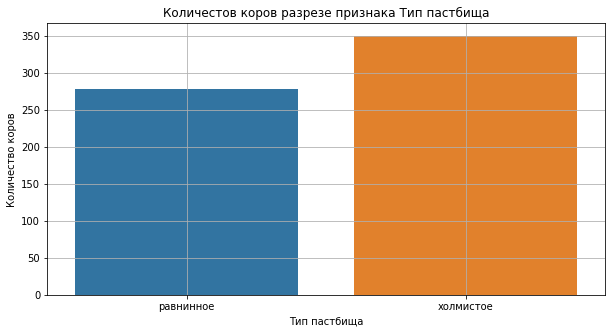

In [64]:
bar(df_ferma_main, 'type_of_pasture', 'Тип пастбища')

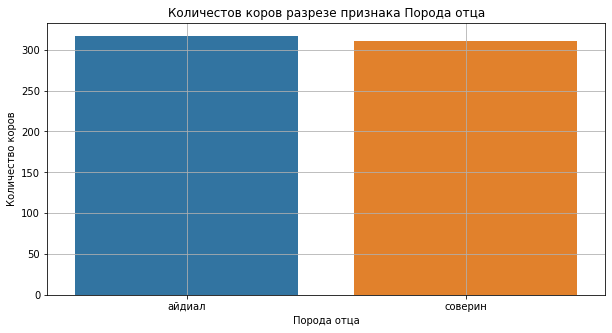

In [65]:
bar(df_ferma_main, 'father_breed', 'Порода отца')

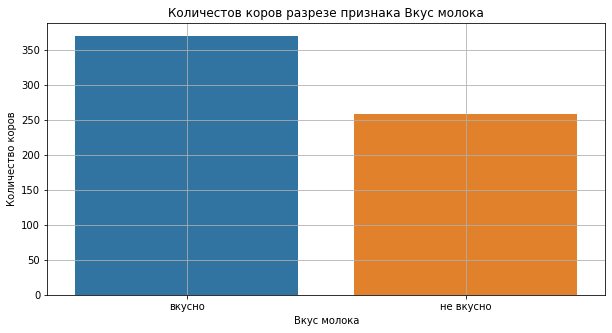

In [66]:
bar(df_ferma_main, 'taste_of_milk', 'Вкус молока')

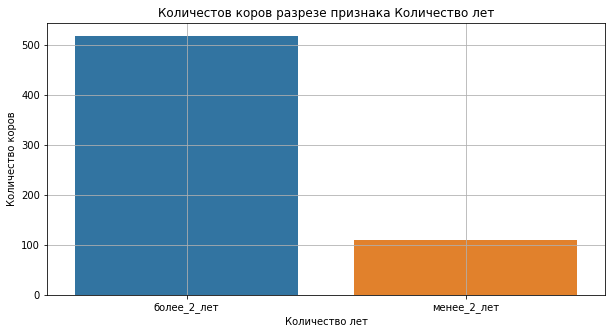

In [67]:
bar(df_ferma_main, 'age', 'Количество лет')

Text(0, 0.5, 'Количество коров')

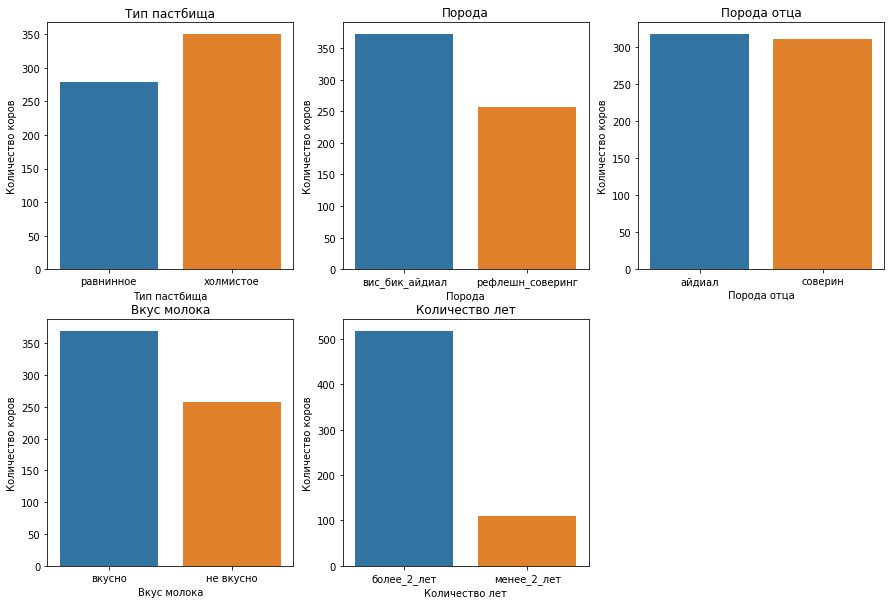

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.countplot(data=df_ferma_main, x='type_of_pasture')
plt.title('Тип пастбища')
plt.xlabel('Тип пастбища')
plt.ylabel('Количество коров')
plt.subplot(232)
sns.countplot(data=df_ferma_main, x='breed')
plt.title('Порода')
plt.xlabel('Порода')
plt.ylabel('Количество коров')
plt.subplot(233)
sns.countplot(data=df_ferma_main, x='father_breed')
plt.title('Порода отца')
plt.xlabel('Порода отца')
plt.ylabel('Количество коров')
plt.subplot(234)
sns.countplot(data=df_ferma_main, x='taste_of_milk')
plt.title('Вкус молока')
plt.xlabel('Вкус молока')
plt.ylabel('Количество коров')
plt.subplot(235)
sns.countplot(data=df_ferma_main, x='age')
plt.title('Количество лет')
plt.xlabel('Количество лет')
plt.ylabel('Количество коров')

#### Для `df_ferma_dad`

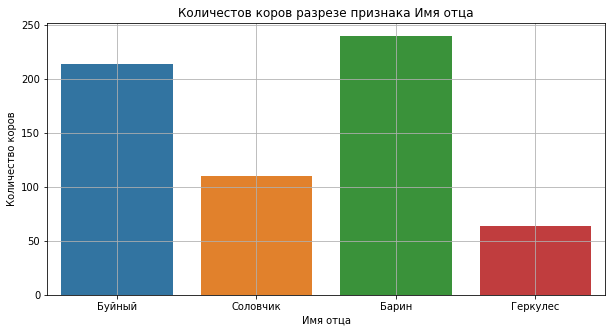

In [69]:
bar(df_ferma_dad, 'father_name', 'Имя отца')

#### Для `df_cow_by`

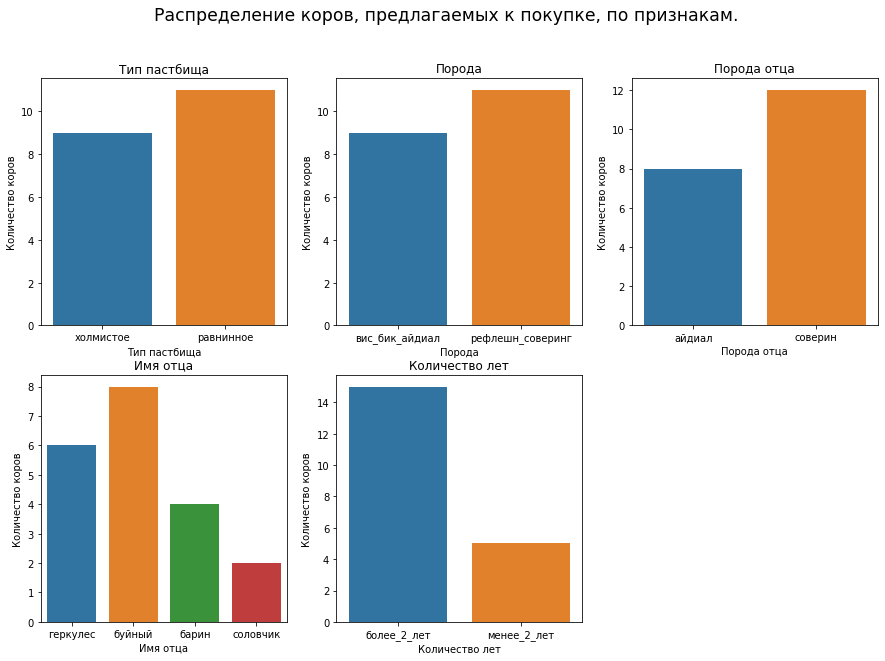

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.countplot(data=df_cow_by, x='type_of_pasture')
plt.title('Тип пастбища')
plt.xlabel('Тип пастбища')
plt.ylabel('Количество коров')
plt.subplot(232)
sns.countplot(data=df_cow_by, x='breed')
plt.title('Порода')
plt.xlabel('Порода')
plt.ylabel('Количество коров')
plt.subplot(233)
sns.countplot(data=df_cow_by, x='father_breed')
plt.title('Порода отца')
plt.xlabel('Порода отца')
plt.ylabel('Количество коров')
plt.subplot(234)
sns.countplot(data=df_cow_by, x='father_name')
plt.title('Имя отца')
plt.xlabel('Имя отца')
plt.ylabel('Количество коров')
plt.subplot(235)
sns.countplot(data=df_cow_by, x='age')
plt.title('Количество лет')
plt.xlabel('Количество лет')
plt.ylabel('Количество коров')
plt.suptitle('Распределение коров, предлагаемых к покупке, по признакам.', fontsize = 'xx-large');

**Выводы:**\
\
1.Данные о коровах фермера:
- Данные о удое имеет нормальное распределение. Средний удой коров 6125 кг;
- График ЭКЕ смещен вправо;
- График сырого протеина смещен влево;
- Вкусное молоко дает большая часть коров фермера;
- Среди коров фермера:
    - преобладают порода Вис бик айдиал
    - больше коров с холмистых пастбищ
    - Молодых (до 2 лет) коров намного меньше, их всего 110
    - Породы отцов одинаковы.
2.Данные о коровах для покупки:
- Преобладают равнинные пастбища
- больше коров породы рефлешн соверинг
- среди пород отцов коров преобладают соверин

## Корреляционный анализ

Для принятия решения о создании модели машинного обучения посмотрим имеется ли связь между признаками в датафрейме. Интересует связь входных и целевых признаков.

In [71]:
df_ferma_main.corr()

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,fat,protein
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
yield,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
energy_feed_unit,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
crude_protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar-protein_ratio,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


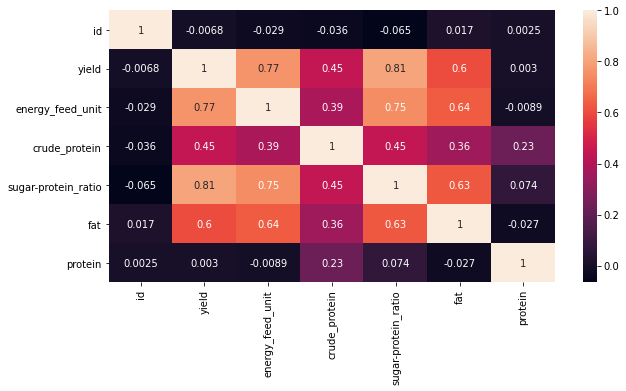

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(df_ferma_main.corr(), annot=True);

Видим корреляцию: Удой зависит от Энергетической кормовой единицы и сахаро-протеинового отношения.

Построим графики


In [73]:
df_ferma_main.head(1)

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age
0,1,5863,14.2,1743,0.89,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет


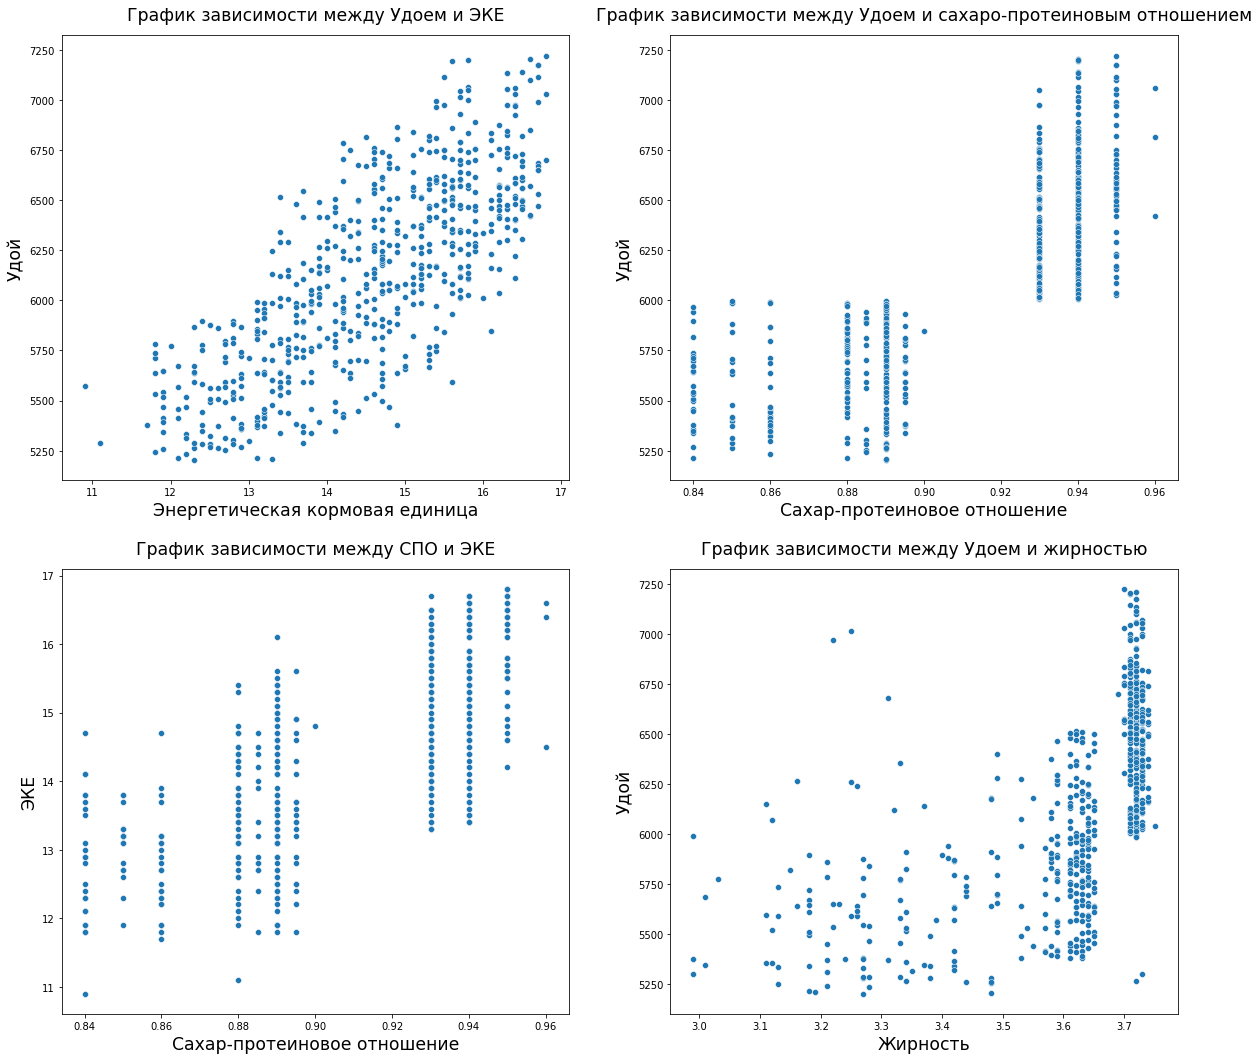

In [74]:
plt.figure(figsize = (20,18))
plt.subplot(221)
sns.scatterplot(x = df_ferma_main['energy_feed_unit'], y = df_ferma_main['yield'])
plt.xlabel('Энергетическая кормовая единица', fontsize = 'xx-large')
plt.ylabel('Удой', fontsize = 'xx-large')
plt.title('График зависимости между Удоем и ЭКЕ', pad =15, fontsize = 'xx-large');
plt.subplot(222)
sns.scatterplot(x = df_ferma_main['sugar-protein_ratio'], y = df_ferma_main['yield'])
plt.xlabel('Сахар-протеиновое отношение', fontsize = 'xx-large')
plt.ylabel('Удой', fontsize = 'xx-large')
plt.title('График зависимости между Удоем и сахаро-протеиновым отношением', pad =15, fontsize = 'xx-large');
plt.subplot(223)
sns.scatterplot(x = df_ferma_main['sugar-protein_ratio'], y = df_ferma_main['energy_feed_unit'])
plt.xlabel('Сахар-протеиновое отношение', fontsize = 'xx-large')
plt.ylabel('ЭКЕ', fontsize = 'xx-large')
plt.title('График зависимости между СПО и ЭКЕ', pad =15, fontsize = 'xx-large');
plt.subplot(224)
sns.scatterplot(x = df_ferma_main['fat'], y = df_ferma_main['yield'])
plt.xlabel('Жирность', fontsize = 'xx-large')
plt.ylabel('Удой', fontsize = 'xx-large')
plt.title('График зависимости между Удоем и жирностью', pad =15, fontsize = 'xx-large');

**Промежуточные выводы:**
- Видим корреляцию Удоя и ЭКЕ. График зависимости похож на дугу.
- СПО похоже на категориальный признак.
- Удой тоже коррелирует с СПО, начиная со значения СПО 0,93 наблюдается рост Удоя. Это означает, что большинство коров дают жирное молоко.

## Обучение модели линейной регрессии

### Обучим модель для предсказания Удоя

Для формирования модели будем использовать признаки, характеризующие корову, характеристики молока, логично, использовать не будем.\
Также уберем признак `id`.

In [75]:
category_columns = ['breed', 'type_of_pasture', 'father_breed', 'age']
number_columns = ['energy_feed_unit', 'crude_protein', 'sugar-protein_ratio']

In [76]:
def linear_model (df, target, category_columns, number_columns):
    X = df.drop(target, axis=1)
    y = df[target]
    RANDOM_STATE = 42
    X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=RANDOM_STATE)

    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[category_columns])
    X_test_ohe = encoder.transform(X_test[category_columns])
    encoder_columns = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[number_columns])
    X_test_scaled = scaler.transform(X_test[number_columns])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_columns)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_columns)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=number_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=number_columns)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis = 1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis = 1)

    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    return [y_test, predictions, model_lr, encoder, scaler]


In [77]:
model_1 = linear_model(df_ferma_main, 'yield', category_columns, number_columns)

In [78]:
prediction_1 = linear_model (df_ferma_main, 'yield', category_columns, number_columns)[1]
y_test_1 = linear_model (df_ferma_main, 'yield', category_columns, number_columns)[0]

Вычислим коэффициент детерминации.

In [79]:
r2_score(y_test_1, prediction_1)

0.7844078173416967

Создадим функцию для формирования метрик модели

In [80]:
def metrics (y_test, prediction):
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error (y_test, prediction).round(2)
    rmse = mean_squared_error (y_test, prediction, squared = False).round(2)
    mae = mean_absolute_error(y_test, prediction).round(2)
    print(f'r2 = {r2}')
    print(f'MSE = {mse}')
    print(f'RMSE = {rmse}')
    print(f'MAE = {mae}')
    return r2, mse, rmse, mae
    

Посчитаем метрики модели

In [81]:
metrics_model_1 = metrics (y_test_1, prediction_1)
metrics_model_1

r2 = 0.7844078173416967
MSE = 43887.02
RMSE = 209.49
MAE = 164.24


(0.7844078173416967, 43887.02, 209.49, 164.24)

Создадим функцию для создания графиком для анализа остатков.

In [82]:
def residuals (y_test, prediction):
    residuals = y_test - prediction
    plt.figure(figsize = (15,5))
    plt.subplot (1,2,1)
    plt.hist(x = residuals, bins = 25)
    plt.xlabel('Значение предсказания модели', fontsize = 'xx-large')
    plt.ylabel('Частота', fontsize = 'xx-large')
    plt.title('Гистограмма распределения остатков', fontsize = 'xx-large')
    plt.subplot (1,2,2)
    plt.scatter(x = prediction, y = residuals)
    plt.xlabel('Значение предсказания модели', fontsize = 'xx-large')
    plt.ylabel('Остатки', fontsize = 'xx-large')
    plt.title('График дисперсии остатков', fontsize = 'xx-large')

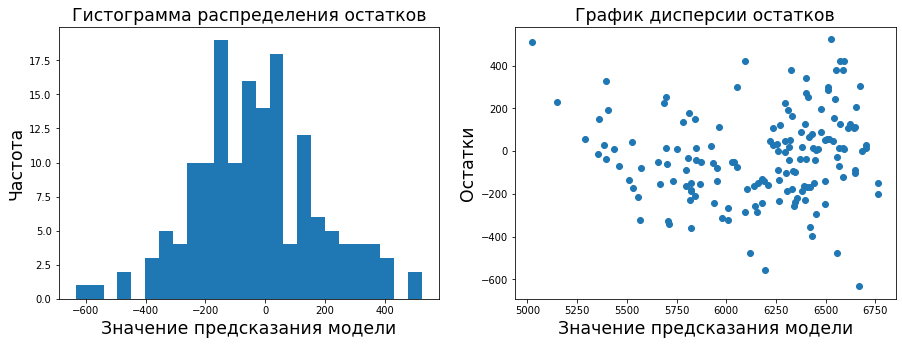

In [83]:
residuals (y_test_1, prediction_1)

**Выводы:**
- Гистограмма смещена влево, это значит, что модель предсказывает завышенные показатели;
- Дисперсия остатков показывает, что остатки распределены неравномерно и модель на больших значениях целевого признака дисперсия возрастает, наблюдается "рупор"

### Теперь преобразуем признак СПО и введем признак ЭКЕ в квадрате

In [84]:
df_ferma_main['сat_sugar-protein_ratio'] = df_ferma_main['sugar-protein_ratio'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')

In [85]:
df_ferma_main['squared_energy_feed_unit'] = df_ferma_main['energy_feed_unit']**2

Теперь посмотрим как ведет себя модель после модернизации признаков.

In [86]:
category_columns = ['сat_sugar-protein_ratio', 'breed', 'type_of_pasture', 'father_breed', 'age']
number_columns = ['squared_energy_feed_unit', 'crude_protein']

In [87]:
model_2 = linear_model (df_ferma_main, 'yield', category_columns, number_columns)

In [88]:
prediction_2 = model_2[1]
y_test_2 = model_2[0]

Посчитаем метрики и проведм анализ остатков

In [89]:
r2_score(y_test_2, prediction_2)

0.8180879926867504

In [90]:
metrics_model_2 = metrics (y_test_2, prediction_2)
metrics_model_2

r2 = 0.8180879926867504
MSE = 37030.91
RMSE = 192.43
MAE = 149.04


(0.8180879926867504, 37030.91, 192.43, 149.04)

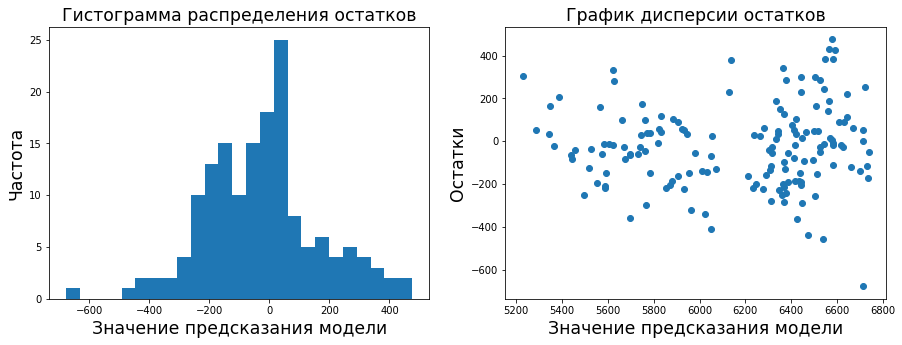

In [91]:
residuals (y_test_2, prediction_2)

**Вывод:**
- метрики улучшились
- анализ остатков по прежнему показывает, что модель дает завышенные показатели (гистограмма смещена влево).
- дисперсия остатков идет на увеличение при росте прогнозных значений

### Добавим признак Имя папы

Для этого соединим два датафреёма методом `merge`

In [92]:
df_ferma_main_1 = df_ferma_main.merge(df_ferma_dad, on = 'id', how='inner')

In [93]:
df_ferma_main_1['father_name'] = df_ferma_main_1['father_name'].str.lower()

In [94]:
df_ferma_main_1.head(1)

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age,сat_sugar-protein_ratio,squared_energy_feed_unit,father_name
0,1,5863,14.2,1743,0.89,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,буйный


Построим третью модель

In [95]:
category_columns = ['сat_sugar-protein_ratio', 'breed', 'type_of_pasture', 'father_breed', 'age', 'father_name']
number_columns = ['squared_energy_feed_unit', 'crude_protein']

In [96]:
model_3 = linear_model (df_ferma_main_1, 'yield', category_columns, number_columns)

In [97]:
prediction_3= model_3[1]
y_test_3 = model_3[0]

In [98]:
r2_score (y_test_3, prediction_3)

0.8247542745210404

In [99]:
metrics_model_3 = metrics (y_test_3, prediction_3)
metrics_model_3

r2 = 0.8247542745210404
MSE = 35673.89
RMSE = 188.88
MAE = 146.16


(0.8247542745210404, 35673.89, 188.88, 146.16)

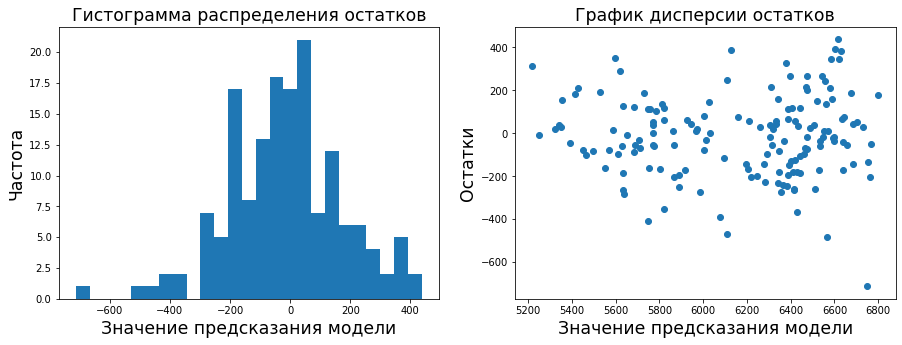

In [100]:
residuals (y_test_3, prediction_3)

In [101]:
(y_test_3 - prediction_3).describe()

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: yield, dtype: float64

**Вывод:**
- У третей модели лучший показатель r2 = 0.82
- Остатки распределены нормально, смещение гистограммы минимально (медиана = -15)
- Дисперсия остатков равномерна.

### Используем третью модель для предсказания.

In [102]:
df_cow_by['squared_energy_feed_unit'] = ((df_ferma_main_1['energy_feed_unit'].mean()*1.05)**2).round(2)

In [103]:
df_cow_by['crude_protein'] = (df_ferma_main_1['crude_protein']*1.05).round(2)

In [104]:
df_cow_by['cat_sugar-protein_ratio'] = df_ferma_main['sugar-protein_ratio'].mean()*1.05

In [105]:
df_cow_by['cat_sugar-protein_ratio'] = df_cow_by['cat_sugar-protein_ratio'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')

In [106]:
df_cow_by = df_cow_by.rename(columns = {'cat_sugar-protein_ratio':'cat_spr'})
df_cow_by.head(1)

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1830.15,более_0.92


In [107]:
df_ferma_main_1 = df_ferma_main_1.rename(columns = {'сat_sugar-protein_ratio': 'cat_spr'})
df_ferma_main_1.head(1)

,id,yield,energy_feed_unit,crude_protein,sugar-protein_ratio,breed,type_of_pasture,father_breed,fat,protein,taste_of_milk,age,cat_spr,squared_energy_feed_unit,father_name
0,1,5863,14.2,1743,0.89,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,буйный


In [108]:
category_columns = ['cat_spr', 'breed', 'type_of_pasture', 'father_breed', 'age', 'father_name']
number_columns = ['squared_energy_feed_unit', 'crude_protein']

Закодируем признаки

In [109]:
model_3[2:]

[LinearRegression(),
 OneHotEncoder(drop='first', sparse=False),
 StandardScaler()]

In [110]:
df_cow_ohe = model_3[3].transform(df_cow_by[category_columns])
encoder_col = model_3[3].get_feature_names()
df_cow_scaler = model_3[4].transform(df_cow_by[number_columns])

df_cow_ohe = pd.DataFrame(df_cow_ohe, columns = encoder_col)
df_cow_scaler = pd.DataFrame(df_cow_scaler, columns = number_columns)

df_cow_for_model = pd.concat([df_cow_ohe, df_cow_scaler], axis=1)


In [111]:
predictions = model_3[2].predict(df_cow_for_model)

In [112]:
for i in range(20):
    df_cow_by.loc[i,'yield'] = predictions[i]

In [113]:
df_cow_by

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr,yield
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1830.15,более_0.92,6556.040969
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.36,2244.90,более_0.92,6442.558123
2,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,1946.70,более_0.92,6263.203781
3,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.36,2112.60,более_0.92,6619.383552
4,рефлешн_соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.36,1758.75,более_0.92,6468.001083
5,рефлешн_соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.36,1896.30,более_0.92,6390.278350
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1881.60,более_0.92,6570.644882
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.36,1896.30,более_0.92,6536.157869
8,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,2013.90,более_0.92,6282.278280
9,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.36,1880.55,более_0.92,6360.968214


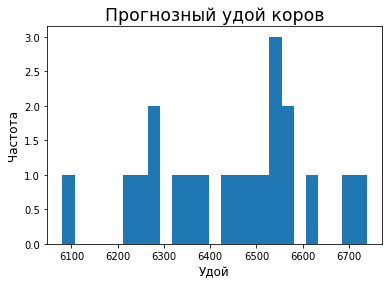

In [114]:
plt.hist(df_cow_by['yield'], bins = 25)
plt.title('Прогнозный удой коров', fontsize = 'xx-large')
plt.xlabel('Удой', fontsize = 'large')
plt.ylabel('Частота', fontsize = 'large');

**Вывод:**
- В данном разделе составлены 3 модели линейной регрессии, выбрана лучшая с показателем r2 = 0.82
- Получены прогнозные значения удоя для всех коров, предлагаемых к покупке.


## Обучение модели логистической регрессии

In [115]:
df_ferma_main_1.columns

Index(['id', 'yield', 'energy_feed_unit', 'crude_protein',
       'sugar-protein_ratio', 'breed', 'type_of_pasture', 'father_breed',
       'fat', 'protein', 'taste_of_milk', 'age', 'cat_spr',
       'squared_energy_feed_unit', 'father_name'],
      dtype='object')

In [116]:
df_ferma_main_1['taste_of_milk'] = df_ferma_main_1['taste_of_milk'].apply(lambda x: 1 if x=='вкусно' else 0)

Accuracy = 0.63
Precision = 0.62
Recall = 0.86


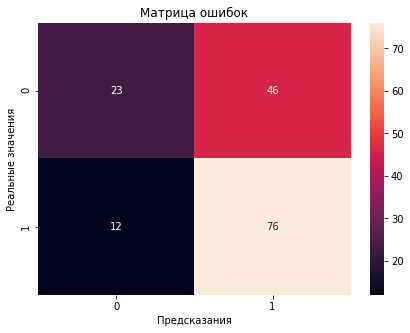

In [117]:
category_columns = ['breed', 'type_of_pasture', 'father_breed', 'age', 'cat_spr', 'father_name']
number_columns = ['crude_protein', 'fat' , 'protein', 'squared_energy_feed_unit']

RANDOM_STATE = 42

X = df_ferma_main_1.drop('taste_of_milk', axis=1)
y = df_ferma_main_1['taste_of_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_test_ohe = encoder.transform(X_test[category_columns])

encoder_columns = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[number_columns])
X_test_scaled = scaler.transform(X_test[number_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_columns)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=number_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=number_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

acc = accuracy_score(y_test, predict).round(2)
precision = precision_score(y_test, predict).round(2)
recall = recall_score(y_test, predict).round(2)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, predict)


sns.heatmap(cm, annot=True);
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Реальные значения')
print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

**Вывод:**
- Построили модель логистической регрессии
- Модель ошибается чаще выдает "ложноположительные результаты. Precision или "точность" составляет 0.62.
- Recall составляет 0.86.

При покупке коров необходимо, чтобы молоко было вкусным, соответственно ложноположительные оценки недопустимы. \
Нужно стремиться уменьшать FP.

In [118]:
y_proba = clf.predict_proba(X_test)[:,1]

df = pd.DataFrame(zip(y_test, y_proba, predict), columns = ['y_valid', 'y_proba', 'predict'])\
.sort_values(by='y_proba',ascending=False)

df.head(30)

,y_valid,y_proba,predict
85,1,0.861355,1
110,1,0.842792,1
66,1,0.841488,1
51,1,0.839668,1
8,1,0.817304,1
147,1,0.813187,1
136,1,0.809539,1
114,1,0.806500,1
108,0,0.805285,1
54,0,0.794684,1


In [119]:
porogs = [round(i,2) for i in np.linspace(0.5,1, 505, endpoint=False)]


In [120]:
columns = []

for i in porogs:
    columns.append('y_pred_'+str(i))
    df['y_pred_'+str(i)] = df['y_proba'].apply(lambda x: 1 if x>= i else 0)
df.head(30)

,y_valid,y_proba,predict,y_pred_0.5,y_pred_0.51,y_pred_0.52,y_pred_0.53,y_pred_0.54,y_pred_0.55,y_pred_0.56,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
85,1,0.861355,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
110,1,0.842792,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.841488,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
51,1,0.839668,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0.817304,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
147,1,0.813187,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
136,1,0.809539,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
114,1,0.806500,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
108,0,0.805285,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
54,0,0.794684,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
for i in porogs:
    cm = confusion_matrix(y_test, df['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print(f'Порог = {i}')
        print('Precision =', precision_score(y_test, df['y_pred_'+str(i)]))
        print(f'TP = {cm[1][1]}')
        print(f'FP = {cm[0][1]}')
        porog = i
        break

Порог = 0.84
Precision = 1.0
TP = 3
FP = 0


Выявили порог 0.84

Accuracy = 0.46
Precision = 1.0
Recall = 0.03


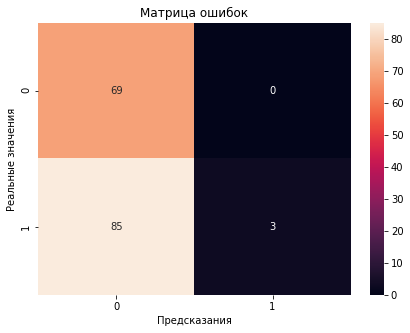

In [122]:
acc = accuracy_score(y_test, df['y_pred_'+str(porog)]).round(2)
precision = precision_score(y_test, df['y_pred_'+str(porog)]).round(2)
recall = recall_score(y_test, df['y_pred_'+str(porog)]).round(2)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, df['y_pred_'+str(porog)])


sns.heatmap(cm, annot=True);
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Реальные значения')
print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

Сделаем предсказания

In [123]:
category_columns = ['breed', 'type_of_pasture', 'father_breed', 'age', 'cat_spr', 'father_name']
number_columns = ['crude_protein', 'squared_energy_feed_unit']

RANDOM_STATE = 42

X = df_ferma_main_1.drop('taste_of_milk', axis=1)
y = df_ferma_main_1['taste_of_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[category_columns])
X_cow_by_ohe = encoder.transform(df_cow_by[category_columns])

encoder_columns = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[number_columns])
X_cow_by_scaled = scaler.transform(df_cow_by[number_columns])


X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_columns)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = number_columns)

X_cow_by_ohe = pd.DataFrame(X_cow_by_ohe, columns=encoder_columns)
X_cow_by_scaler = pd.DataFrame(X_cow_by_scaled, columns=number_columns)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_cow_by = pd.concat([X_cow_by_ohe, X_cow_by_scaler], axis=1)


clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

proba = clf.predict_proba(X_cow_by)[:,1]

for i in range(len(proba)):
    df_cow_by.loc[i,'y_proba'] = proba[i]


#При сравнении с порогом значения proba получим характеристику "Вкусно" или "не вкусно"  
    
df_cow_by['taste_of_milk'] = df_cow_by['y_proba'].apply(lambda x: 'вкусно' if x>=porog else 'не_вкусно')


In [124]:
df_cow_by

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr,yield,y_proba,taste_of_milk
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1830.15,более_0.92,6556.040969,0.661218,не_вкусно
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.36,2244.90,более_0.92,6442.558123,0.614233,не_вкусно
2,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,1946.70,более_0.92,6263.203781,0.562384,не_вкусно
3,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.36,2112.60,более_0.92,6619.383552,0.732226,не_вкусно
4,рефлешн_соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.36,1758.75,более_0.92,6468.001083,0.495220,не_вкусно
5,рефлешн_соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.36,1896.30,более_0.92,6390.278350,0.455228,не_вкусно
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1881.60,более_0.92,6570.644882,0.675841,не_вкусно
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.36,1896.30,более_0.92,6536.157869,0.551125,не_вкусно
8,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,2013.90,более_0.92,6282.278280,0.583472,не_вкусно
9,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.36,1880.55,более_0.92,6360.968214,0.627395,не_вкусно


Выберем порог ниже. К примеру 0.7

In [125]:
porog = 0.75

Метрики будут следующие

Accuracy = 0.55
Precision = 0.85
Recall = 0.25


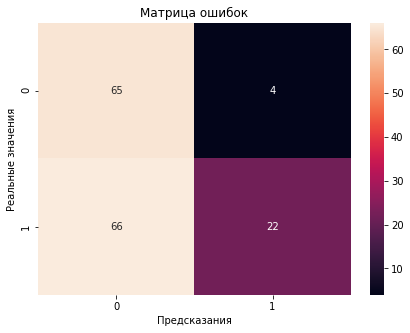

In [126]:
acc = accuracy_score(y_test, df['y_pred_'+str(porog)]).round(2)
precision = precision_score(y_test, df['y_pred_'+str(porog)]).round(2)
recall = recall_score(y_test, df['y_pred_'+str(porog)]).round(2)

plt.figure(figsize = (7,5))
cm = confusion_matrix(y_test, df['y_pred_'+str(porog)])


sns.heatmap(cm, annot=True);
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Реальные значения')
print(f'Accuracy = {acc}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Логистическая регрессия сделана хорошо

In [127]:
df_cow_by['taste_of_milk'] = df_cow_by['y_proba'].apply(lambda x: 'вкусно' if x>=porog else 'не_вкусно')

In [128]:
df_cow_by

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr,yield,y_proba,taste_of_milk
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1830.15,более_0.92,6556.040969,0.661218,не_вкусно
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.36,2244.90,более_0.92,6442.558123,0.614233,не_вкусно
2,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,1946.70,более_0.92,6263.203781,0.562384,не_вкусно
3,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.36,2112.60,более_0.92,6619.383552,0.732226,не_вкусно
4,рефлешн_соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.36,1758.75,более_0.92,6468.001083,0.495220,не_вкусно
5,рефлешн_соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.36,1896.30,более_0.92,6390.278350,0.455228,не_вкусно
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.36,1881.60,более_0.92,6570.644882,0.675841,не_вкусно
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.36,1896.30,более_0.92,6536.157869,0.551125,не_вкусно
8,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.36,2013.90,более_0.92,6282.278280,0.583472,не_вкусно
9,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.36,1880.55,более_0.92,6360.968214,0.627395,не_вкусно


Выберем с помощью моделей коровы для покупки.

In [129]:
recommendation = df_cow_by[(df_cow_by['yield'] > 6000) & (df_cow_by['taste_of_milk'] == 'вкусно')]
recommendation

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr,yield,y_proba,taste_of_milk
12,вис_бик_айдиал,холмистое,айдиал,геркулес,3.68,3.046,более_2_лет,233.36,2302.65,более_0.92,6690.158539,0.781566,вкусно


**Вывод:**
1. Составлена логистическая модель для выбора коровы, которая дает вкусное молоко.
2. Выбран порог для категории вкусно - 0.75. Составлены метрики для модели. Точность составила 0.85 при полноте 25%.
    - Accuracy = 0.55
    - Precision = 0.85
    - Recall = 0.25
3. При работе модели выбрана одна корова для покупки.

## Итоговые выводы

1. В ходе работы были изучены данные о коровах фермера, именах их отцов и коровах для покупки.

2. Выполнена предобработка. \
Выявлены и обработаны пропуски, дубликаты, аномалии, а также изменены типы данных\
Название столбцов приведены к змеиному регистру.
3. Выполнен исследовательский анализ данных.
    - Данные о коровах фермера:
        - Данные о удое имеет нормальное распределение. Средний удой коров 6125 кг;
        - График ЭКЕ смещен вправо;
        - График сырого протеина смещен влево;
        - Вкусное молоко дает большая часть коров фермера;
        - Среди коров фермера:
            - преобладают порода Вис бик айдиал
            - больше коров с холмистых пастбищ
            - Молодых (до 2 лет) коров намного меньше, их всего 110
            - Породы отцов одинаковы.
    -Данные о коровах для покупки:
        - Преобладают равнинные пастбища
        - больше коров породы рефлешн соверинг
        - среди пород отцов коров преобладают соверин

4. Проведен корреляционный анализ признаков.

- Видим корреляцию Удоя и ЭКЕ. График зависимости похож на дугу.
- СПО похоже на категориальный признак.
- Удой тоже коррелирует с СПО, начиная со значения СПО 0,93 наблюдается рост Удоя. Это означает, что большинство коров дают жирное молоко.

5. Составлены три линейные модели для предсказания. Третья модель показала лучшие характеристики по метрикам и анализу остатков.\
Третья модель получена путем преобразования столбцов СПО в категориальный тип и возведения в квадрат ЭКЕ. Также добавлен признак с именем отца.
Метрики модели следующие:
    - r2 = 0.8247542745210404
    - MSE = 35673.89
    - RMSE = 188.88
    - MAE = 146.16
В результате получены прогнозные значения Удоя, который составил более 6000 для всех коров.
6. Составлена логистическая модель для определения вкуса молока. \
Фермер преследует цель купить корову, которая будет давать вкусное молоко, следовательно ошибки FP недопустимы. \
С этой целью модель донастроена, установлен порог 0.75.\
В результате получена рекомендация для фермера о покупке коровы с необходимым удоем и вкусным молоком.


**Рекомендация заказчику:**
К приобретению рекомендуется следующая корова.


In [130]:
recommendation

,breed,type_of_pasture,father_breed,father_name,current_fat_content,current_protein_content,age,squared_energy_feed_unit,crude_protein,cat_spr,yield,y_proba,taste_of_milk
12,вис_бик_айдиал,холмистое,айдиал,геркулес,3.68,3.046,более_2_лет,233.36,2302.65,более_0.92,6690.158539,0.781566,вкусно
